# 1. Implement with Naive bayes

In [3]:
#importing all the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df = pd.read_csv('deceptive-opinion2.csv')

In [5]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [6]:
df.tail()

,deceptive,hotel,polarity,source,text
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [7]:
#Extracting only the requireed features
df1 = df[['deceptive', 'text']]
df1

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...
...,...,...
1595,deceptive,Problems started when I booked the InterContin...
1596,deceptive,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,"The Palmer House Hilton, while it looks good i..."


In [8]:
#filling the categorical variable deceptive with 0 for fake review and 1 for real review
df1.loc[df1['deceptive'] == 'deceptive', 'deceptive'] = 0
df1.loc[df1['deceptive'] == 'truthful', 'deceptive'] = 1

C:\Users\Shree\AppData\Local\Temp\ipykernel_10184\3325549381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['deceptive'] == 'deceptive', 'deceptive'] = 0
C:\Users\Shree\AppData\Local\Temp\ipykernel_10184\3325549381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['deceptive'] == 'truthful', 'deceptive'] = 1


In [9]:
#Printing Dataframe1
df1

,deceptive,text
0,1,We stayed for a one night getaway with family ...
1,1,Triple A rate with upgrade to view room was le...
2,1,This comes a little late as I'm finally catchi...
3,1,The Omni Chicago really delivers on all fronts...
4,1,I asked for a high floor away from the elevato...
...,...,...
1595,0,Problems started when I booked the InterContin...
1596,0,The Amalfi Hotel has a beautiful website and i...
1597,0,The Intercontinental Chicago Magnificent Mile ...
1598,0,"The Palmer House Hilton, while it looks good i..."


In [10]:
#Taking the input and output features seperately
X = df1['text']
Y = np.asarray(df1['deceptive'], dtype = int)

In [11]:
#importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [12]:
#splitting the data into training and testing set  with test size is 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [13]:
X_test

1063    We stayed at the Ritz Carlton two weeks prior,...
21      We went to Chicago to see an exhibit at the Ar...
1480    I recently stayed in The James Hotel in Chicag...
1215    Hyatt Regency Hotel: Good ole Downtown, Chicag...
459     Me and my husband got married here. We loved t...
                              ...                        
133     Perfect location, clean and courteous staff al...
1252    If you want a 5-star hotel with 1-star service...
254     We had our hotel reservations at another hotel...
386     We became an Ambassador member just before spe...
1240    My experience as Fairmont Chicago Millennium P...
Name: text, Length: 480, dtype: object

In [14]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [15]:
nb = MultinomialNB()

In [16]:
#Converting the review (text feature) to numerical features
cv_nb = CountVectorizer()
x = cv_nb.fit_transform(X_train)
y = cv_nb.transform(X_test)

In [17]:
# Fitting the model
nb.fit(x, y_train)
pickle.dump(nb,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [18]:
nb.predict(y)

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [19]:
# Training Accuracy
nb.score(x, y_train)

0.9714285714285714

In [51]:
# Testing Accuracy
NB_acc= nb.score(y, y_test)
NB_acc

0.85625

In [22]:
vect12 = cv_nb.transform(X_test).toarray()
pred12 = nb.predict(vect12)
pred12

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [24]:
#PREDICTION_NB
data = ["My husband and I recently went to Chicago for my Aunt's funeral. We are not familiar with the area so we asked for recommedations of where to stay for the two nights we would be in town. We were told to stay at the Ambassador East Hotel. I wish we could say that our experience there was a good one, but sadly, it was one of of the more disappointing travel experiences we have had. Upon check in we were quickly shown to our rooms, but when we entered our king suite a very strong, musty smell greeted us on the other side. At first I thought I was just being sensitive, but after about an hour in the room we simply had to request to be moved. The smell was too overwhelming. The front desk said they would be happy to move us, but the only other room available was a suite with two double beds, rather than the king bed suite we originally reserved. While this was not exactly what we wanted, we didn't really have a choice to refuse. After transfering to the new room and getting settled, we discovered that the electrical outlet near the sink in the bathroom did not work. While this did not bother my husband too much, I was very annoyed, as I need the mirror while I use my hair dryer, curling iron, etc. I absolutely did not want to have to switch rooms yet again, so I simply had to make due with doing my hair next to the bed. They also only gave us two towels of any kind in the bathroom, so we had to request washcloths and small hand towels, BOTH DAYS we were there! Each time the housekeeping staff seemed incredibly annoyed at these requests. For what we paid to stay at this hotel, we were not impressed at all. The customer service was lackluster and the rooms were not up to par. If you are ever in Chicago, do yourself a favor and stay somewhere else."]
vect13 = cv_nb.transform(data).toarray()
pred13 = nb.predict(vect13)
pred13

array([0])

# More Evaluation metrcis - NB

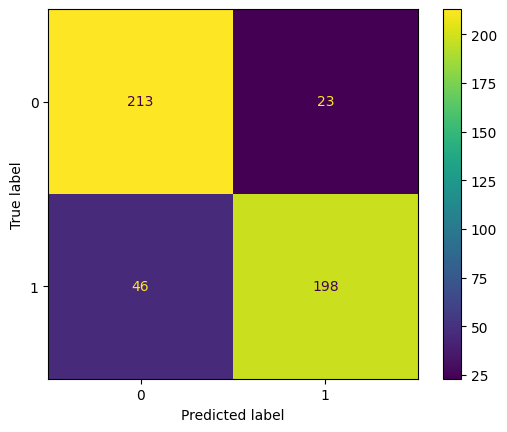

In [27]:
# Create the confusion matrix
# Generate predictions with the best model
vect13 = cv_nb.transform(X_test).toarray()
y13_pred = nb.predict(vect13)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm13 = confusion_matrix(y_test, y13_pred)

ConfusionMatrixDisplay(confusion_matrix=cm13).plot();

# 2. Implementing with SVM

In [33]:
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

In [34]:
#Train the model using the training sets
clf_svm.fit(x, y_train)

SVC(kernel='linear')

In [35]:
#Converting the review (text feature) to numerical features
cv_svm = CountVectorizer()
x = cv_svm.fit_transform(X_train)
y = cv_svm.transform(X_test)

In [36]:
pickle.dump(clf_svm,open('model_svm.pkl','wb'))
model=pickle.load(open('model_svm.pkl','rb'))

In [37]:
#Predict the response for test dataset
y_pred = clf_svm.predict(y)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [38]:
#Training accuracy
clf_svm.score(x, y_train) 

1.0

In [48]:
#Testing accuracy
SVM_acc = clf_svm.score(y, y_test)
SVM_acc

0.8166666666666667

In [43]:
vect21 = cv_svm.transform(X_test).toarray()
pred21 = clf_svm.predict(vect21)
pred21

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [44]:
#PREDICTION_NB
data0 = ["My husband and I recently went to Chicago for my Aunt's funeral. We are not familiar with the area so we asked for recommedations of where to stay for the two nights we would be in town. We were told to stay at the Ambassador East Hotel. I wish we could say that our experience there was a good one, but sadly, it was one of of the more disappointing travel experiences we have had. Upon check in we were quickly shown to our rooms, but when we entered our king suite a very strong, musty smell greeted us on the other side. At first I thought I was just being sensitive, but after about an hour in the room we simply had to request to be moved. The smell was too overwhelming. The front desk said they would be happy to move us, but the only other room available was a suite with two double beds, rather than the king bed suite we originally reserved. While this was not exactly what we wanted, we didn't really have a choice to refuse. After transfering to the new room and getting settled, we discovered that the electrical outlet near the sink in the bathroom did not work. While this did not bother my husband too much, I was very annoyed, as I need the mirror while I use my hair dryer, curling iron, etc. I absolutely did not want to have to switch rooms yet again, so I simply had to make due with doing my hair next to the bed. They also only gave us two towels of any kind in the bathroom, so we had to request washcloths and small hand towels, BOTH DAYS we were there! Each time the housekeeping staff seemed incredibly annoyed at these requests. For what we paid to stay at this hotel, we were not impressed at all. The customer service was lackluster and the rooms were not up to par. If you are ever in Chicago, do yourself a favor and stay somewhere else."]
vect31 = cv_svm.transform(data0).toarray()
pred31 = nb.predict(vect31)
pred31

array([0])

# More Evaluation metrcis - SVM

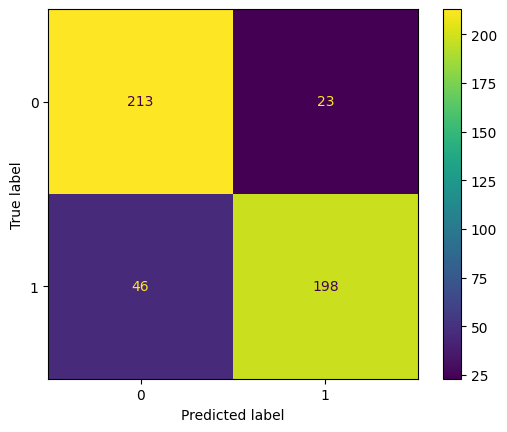

In [45]:
# Create the confusion matrix
# Generate predictions with the best model
vect14 = cv_svm.transform(X_test).toarray()
y31_pred = nb.predict(vect14)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm14 = confusion_matrix(y_test, y31_pred)

ConfusionMatrixDisplay(confusion_matrix=cm14).plot();

# Compare the results 

<BarContainer object of 2 artists>

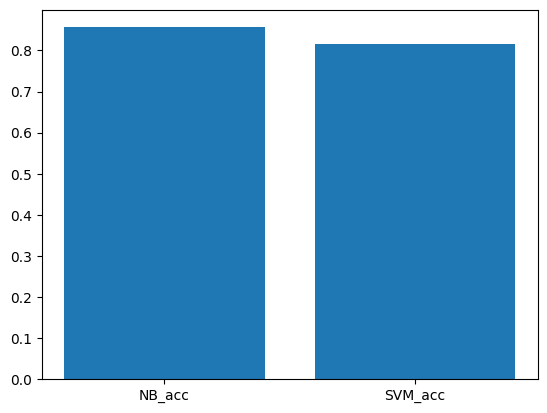

In [52]:
import matplotlib.pyplot as plt
x = ["NB_acc", "SVM_acc"]
y = [NB_acc, SVM_acc]

fig, ax = plt.subplots()
ax.bar(x = x, height = y)

# 3. Semi Supervised using SVM

In [126]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X1_train, X1_unl, y1_train, y1_unl = train_test_split(X1_train, y1_train, test_size=0.6, random_state=1)


In [127]:
print(X1_train.shape)
print(X1_test.shape)
print(X1_unl.shape)

(448,)
(480,)
(672,)


In [128]:
X1_train

1141    We were checked into a room with empty beer bo...
747     I stayed here with my family when we were in C...
839     Will start by saying the employees were wonder...
1287    I booked a room at Swissotel Chicago because I...
1492    I was here on business so I needed to get some...
                              ...                        
272     I can only confirm the positve reviews previou...
832     I haven't stayed all that much with Hyatt and ...
398     This hotel was wonderful! I am a college stude...
603     The Hard Rock Hotel in Chicago has it all: loc...
1050    Over-hyped and over-priced. The fact that they...
Name: text, Length: 448, dtype: object

In [129]:
X1_test

75      The reviews we read were a bit mixed, but I th...
1284    After considering several hotels in the area, ...
408     If you are looking for a luxurious downtown Ch...
1282    I recently stayed at the Swissotel Chicago wit...
1447    I wish to express my dissatisfaction with my s...
                              ...                        
1097    We got a spanking deal at this hotel for $99 a...
985     Let me start by saying we are seasoned travele...
671     I stayed at the monaco for the Labor day weeke...
1523    I recently visited Chicago. I stayed at the Ho...
1170    When you check into a hotel after being stuck ...
Name: text, Length: 480, dtype: object

# Training on the labeled set

In [130]:
#Converting the review (text feature) to numerical features
cv = CountVectorizer()
x2 = cv.fit_transform(X1_train)
y2 = cv.transform(X1_test)

In [131]:
clf2 = svm.SVC(kernel='linear', probability=True,C=1)
clf2.fit(x2, y1_train)


SVC(C=1, kernel='linear', probability=True)

In [132]:
clf2.score(y2, y1_test)

0.8208333333333333

In [133]:
pickle.dump(clf2,open('model_svm_semisuper.pkl','wb'))
model=pickle.load(open('model_svm_semisuper.pkl','rb'))

In [134]:
clf2.predict(y2)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [135]:
# Training Accuracy
clf2.score(x2, y1_train)

1.0

In [136]:
# Testing Accuracy
SVM_acc = clf2.score(y2, y1_test)
SVM_acc

0.8208333333333333

In [137]:
X1_unl

1372    The Ambassador East Hotel is a terrible place ...
821     The hotel is well located, but the service is ...
415     My husband and I stayed at the Hyatt Regency w...
10      I stayed at the Fairmont Chicago for one night...
1271    Whenever I decided to stay at Fairmont Chicago...
                              ...                        
1396    My husband and I recently went to Chicago for ...
1341    I recently had the misfortune of staying at th...
224     I had a large, roomy, clean 2 bed room with a ...
745     The Amalfi Hotel in Chicago was by far one of ...
838     I was very disappointed with the hotel this ti...
Name: text, Length: 672, dtype: object

In [138]:
y1_unl

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [139]:
vect = cv.transform(X1_unl).toarray()
pred = clf2.predict(vect)
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [140]:
#PREDICTION
data = ["My husband and I recently went to Chicago for my Aunt's funeral. We are not familiar with the area so we asked for recommedations of where to stay for the two nights we would be in town. We were told to stay at the Ambassador East Hotel. I wish we could say that our experience there was a good one, but sadly, it was one of of the more disappointing travel experiences we have had. Upon check in we were quickly shown to our rooms, but when we entered our king suite a very strong, musty smell greeted us on the other side. At first I thought I was just being sensitive, but after about an hour in the room we simply had to request to be moved. The smell was too overwhelming. The front desk said they would be happy to move us, but the only other room available was a suite with two double beds, rather than the king bed suite we originally reserved. While this was not exactly what we wanted, we didn't really have a choice to refuse. After transfering to the new room and getting settled, we discovered that the electrical outlet near the sink in the bathroom did not work. While this did not bother my husband too much, I was very annoyed, as I need the mirror while I use my hair dryer, curling iron, etc. I absolutely did not want to have to switch rooms yet again, so I simply had to make due with doing my hair next to the bed. They also only gave us two towels of any kind in the bathroom, so we had to request washcloths and small hand towels, BOTH DAYS we were there! Each time the housekeeping staff seemed incredibly annoyed at these requests. For what we paid to stay at this hotel, we were not impressed at all. The customer service was lackluster and the rooms were not up to par. If you are ever in Chicago, do yourself a favor and stay somewhere else."]
vect1 = cv.transform(data).toarray()
pred1 = clf2.predict(vect1)
pred1

array([0])

# More Evaluation metrcis - SVM

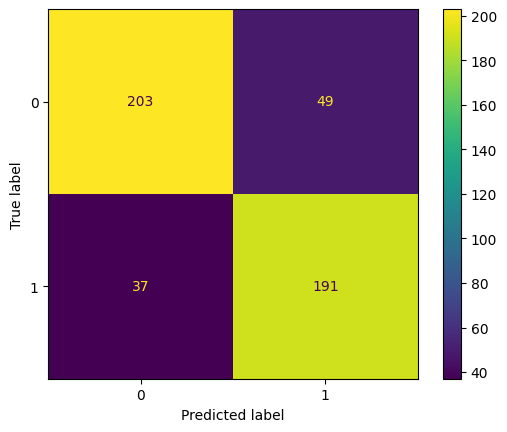

In [141]:
# Create the confusion matrix
# Generate predictions with the best model
vect11 = cv1.transform(X1_test).toarray()
y1_pred = clf2.predict(vect11)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm1 = confusion_matrix(y1_test, y1_pred)

ConfusionMatrixDisplay(confusion_matrix=cm1).plot();

# 4. Decesion Tree based semi-supervised Learning 

In [142]:
from sklearn.tree import DecisionTreeClassifier 

In [143]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X2_train, X2_unl, y2_train, y2_unl = train_test_split(X2_train, y2_train, test_size=0.6, random_state=1)

In [144]:
print(X2_train.shape)
print(X2_test.shape)
print(X2_unl.shape)

(448,)
(480,)
(672,)


In [145]:
X2_train

1141    We were checked into a room with empty beer bo...
747     I stayed here with my family when we were in C...
839     Will start by saying the employees were wonder...
1287    I booked a room at Swissotel Chicago because I...
1492    I was here on business so I needed to get some...
                              ...                        
272     I can only confirm the positve reviews previou...
832     I haven't stayed all that much with Hyatt and ...
398     This hotel was wonderful! I am a college stude...
603     The Hard Rock Hotel in Chicago has it all: loc...
1050    Over-hyped and over-priced. The fact that they...
Name: text, Length: 448, dtype: object

In [146]:
X2_test

75      The reviews we read were a bit mixed, but I th...
1284    After considering several hotels in the area, ...
408     If you are looking for a luxurious downtown Ch...
1282    I recently stayed at the Swissotel Chicago wit...
1447    I wish to express my dissatisfaction with my s...
                              ...                        
1097    We got a spanking deal at this hotel for $99 a...
985     Let me start by saying we are seasoned travele...
671     I stayed at the monaco for the Labor day weeke...
1523    I recently visited Chicago. I stayed at the Ho...
1170    When you check into a hotel after being stuck ...
Name: text, Length: 480, dtype: object

# Training on the labeled set

In [147]:
#Converting the review (text feature) to numerical features
cv1 = CountVectorizer()
x3 = cv1.fit_transform(X2_train)
y3 = cv1.transform(X2_test)

In [148]:
clf3 =DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf3.fit(x3, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [149]:
clf3.score(y3, y2_test)

0.6770833333333334

In [150]:
pickle.dump(clf3,open('model_DT_semisuper.pkl','wb'))
model2=pickle.load(open('model_DT_semisuper.pkl','rb'))

In [151]:
clf3.predict(y3)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [152]:
# Training Accuracy
clf2.score(x3, y2_train)

1.0

In [153]:
# Testing Accuracy
DT_acc = clf3.score(y3, y2_test)
DT_acc

0.6770833333333334

In [154]:
X2_unl

1372    The Ambassador East Hotel is a terrible place ...
821     The hotel is well located, but the service is ...
415     My husband and I stayed at the Hyatt Regency w...
10      I stayed at the Fairmont Chicago for one night...
1271    Whenever I decided to stay at Fairmont Chicago...
                              ...                        
1396    My husband and I recently went to Chicago for ...
1341    I recently had the misfortune of staying at th...
224     I had a large, roomy, clean 2 bed room with a ...
745     The Amalfi Hotel in Chicago was by far one of ...
838     I was very disappointed with the hotel this ti...
Name: text, Length: 672, dtype: object

In [155]:
y2_unl

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [156]:
vect2 = cv1.transform(X2_unl).toarray()
pred2 = clf3.predict(vect2)
pred2

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [157]:
#PREDICTION
data2 = ["My husband and I recently went to Chicago for my Aunt's funeral. We are not familiar with the area so we asked for recommedations of where to stay for the two nights we would be in town. We were told to stay at the Ambassador East Hotel. I wish we could say that our experience there was a good one, but sadly, it was one of of the more disappointing travel experiences we have had. Upon check in we were quickly shown to our rooms, but when we entered our king suite a very strong, musty smell greeted us on the other side. At first I thought I was just being sensitive, but after about an hour in the room we simply had to request to be moved. The smell was too overwhelming. The front desk said they would be happy to move us, but the only other room available was a suite with two double beds, rather than the king bed suite we originally reserved. While this was not exactly what we wanted, we didn't really have a choice to refuse. After transfering to the new room and getting settled, we discovered that the electrical outlet near the sink in the bathroom did not work. While this did not bother my husband too much, I was very annoyed, as I need the mirror while I use my hair dryer, curling iron, etc. I absolutely did not want to have to switch rooms yet again, so I simply had to make due with doing my hair next to the bed. They also only gave us two towels of any kind in the bathroom, so we had to request washcloths and small hand towels, BOTH DAYS we were there! Each time the housekeeping staff seemed incredibly annoyed at these requests. For what we paid to stay at this hotel, we were not impressed at all. The customer service was lackluster and the rooms were not up to par. If you are ever in Chicago, do yourself a favor and stay somewhere else."]
vect3 = cv1.transform(data2).toarray()
pred2 = clf3.predict(vect3)
pred2

array([1])

# More Evaluation Metrics - DT


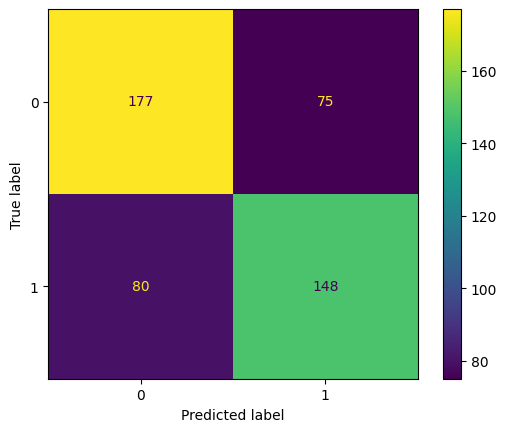

In [158]:
# Create the confusion matrix
# Generate predictions with the best model
vect4 = cv1.transform(X2_test).toarray()
y_pred = clf3.predict(vect4)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm = confusion_matrix(y2_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# 5. Random Forest based semi-supervised Learning 

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X3_train, X3_unl, y3_train, y3_unl = train_test_split(X3_train, y3_train, test_size=0.6, random_state=1)

In [161]:
print(X3_train.shape)
print(X3_test.shape)
print(X3_unl.shape)

(448,)
(480,)
(672,)


In [162]:
X3_train

1141    We were checked into a room with empty beer bo...
747     I stayed here with my family when we were in C...
839     Will start by saying the employees were wonder...
1287    I booked a room at Swissotel Chicago because I...
1492    I was here on business so I needed to get some...
                              ...                        
272     I can only confirm the positve reviews previou...
832     I haven't stayed all that much with Hyatt and ...
398     This hotel was wonderful! I am a college stude...
603     The Hard Rock Hotel in Chicago has it all: loc...
1050    Over-hyped and over-priced. The fact that they...
Name: text, Length: 448, dtype: object

In [163]:
X3_test

75      The reviews we read were a bit mixed, but I th...
1284    After considering several hotels in the area, ...
408     If you are looking for a luxurious downtown Ch...
1282    I recently stayed at the Swissotel Chicago wit...
1447    I wish to express my dissatisfaction with my s...
                              ...                        
1097    We got a spanking deal at this hotel for $99 a...
985     Let me start by saying we are seasoned travele...
671     I stayed at the monaco for the Labor day weeke...
1523    I recently visited Chicago. I stayed at the Ho...
1170    When you check into a hotel after being stuck ...
Name: text, Length: 480, dtype: object

# Training on the labeled set

In [164]:
#Converting the review (text feature) to numerical features
cv2 = CountVectorizer()
x4 = cv2.fit_transform(X3_train)
y4 = cv2.transform(X3_test)

In [165]:
clf4 =RandomForestClassifier()
clf4.fit(x4, y3_train)

RandomForestClassifier()

In [166]:
clf4.score(y4, y3_test)

0.8208333333333333

In [167]:
pickle.dump(clf4,open('model_RF_semisuper.pkl','wb'))
model3=pickle.load(open('model_RF_semisuper.pkl','rb'))

In [168]:
clf4.predict(y4)

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [169]:
# Training Accuracy
clf4.score(x4, y3_train)

1.0

In [170]:
# Testing Accuracy
RF_Acc = clf4.score(y4, y3_test)
RF_Acc

0.8208333333333333

In [171]:
X3_unl

1372    The Ambassador East Hotel is a terrible place ...
821     The hotel is well located, but the service is ...
415     My husband and I stayed at the Hyatt Regency w...
10      I stayed at the Fairmont Chicago for one night...
1271    Whenever I decided to stay at Fairmont Chicago...
                              ...                        
1396    My husband and I recently went to Chicago for ...
1341    I recently had the misfortune of staying at th...
224     I had a large, roomy, clean 2 bed room with a ...
745     The Amalfi Hotel in Chicago was by far one of ...
838     I was very disappointed with the hotel this ti...
Name: text, Length: 672, dtype: object

In [172]:
y3_unl

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [173]:
vect5 = cv2.transform(X3_unl).toarray()
pred5 = clf3.predict(vect5)
pred5

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [174]:
#PREDICTION
data3 = ["My husband and I recently went to Chicago for my Aunt's funeral. We are not familiar with the area so we asked for recommedations of where to stay for the two nights we would be in town. We were told to stay at the Ambassador East Hotel. I wish we could say that our experience there was a good one, but sadly, it was one of of the more disappointing travel experiences we have had. Upon check in we were quickly shown to our rooms, but when we entered our king suite a very strong, musty smell greeted us on the other side. At first I thought I was just being sensitive, but after about an hour in the room we simply had to request to be moved. The smell was too overwhelming. The front desk said they would be happy to move us, but the only other room available was a suite with two double beds, rather than the king bed suite we originally reserved. While this was not exactly what we wanted, we didn't really have a choice to refuse. After transfering to the new room and getting settled, we discovered that the electrical outlet near the sink in the bathroom did not work. While this did not bother my husband too much, I was very annoyed, as I need the mirror while I use my hair dryer, curling iron, etc. I absolutely did not want to have to switch rooms yet again, so I simply had to make due with doing my hair next to the bed. They also only gave us two towels of any kind in the bathroom, so we had to request washcloths and small hand towels, BOTH DAYS we were there! Each time the housekeeping staff seemed incredibly annoyed at these requests. For what we paid to stay at this hotel, we were not impressed at all. The customer service was lackluster and the rooms were not up to par. If you are ever in Chicago, do yourself a favor and stay somewhere else."]
vect6 = cv2.transform(data2).toarray()
pred6 = clf4.predict(vect6)
pred6

array([0])

# More Evaluation Metrics - RF


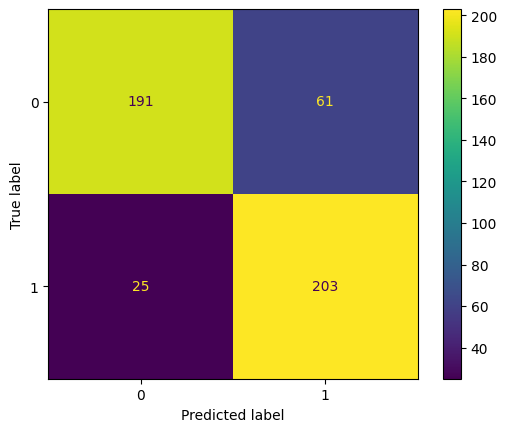

In [175]:
# Create the confusion matrix
# Generate predictions with the best model
vect7 = cv2.transform(X3_test).toarray()
y2_pred = clf4.predict(vect7)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm2 = confusion_matrix(y3_test, y2_pred)

ConfusionMatrixDisplay(confusion_matrix=cm2).plot();

# 6. Compare Algorithms Accuracy

<BarContainer object of 3 artists>

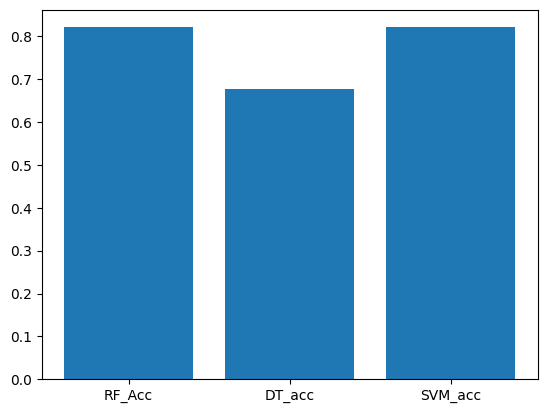

In [176]:
import matplotlib.pyplot as plt
x = ["RF_Acc", "DT_acc", "SVM_acc"]
y = [RF_Acc, DT_acc, SVM_acc]

fig, ax = plt.subplots()
ax.bar(x = x, height = y)